In [3]:
#import Series from pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
sales = pd.read_csv('/home/raghav/Videos/Linear regression/Crime rate/Philadelphia_Crime_Rate_noNA.csv')

In [5]:
sales["Id"]=sales.index

In [6]:
sales.head(5)

HousePrice  HsPrc ($10,000)  CrimeRate  MilesPhila  PopChg        Name  \
0      140463          14.0463       29.7          10    -1.0    Abington   
1      113033          11.3033       24.1          18     4.0      Ambler   
2      124186          12.4186       19.5          25     8.0       Aston   
3      110490          11.0490       49.4          25     2.7    Bensalem   
4       79124           7.9124       54.1          19     3.9  Bristol B.   

     County  Id  
0  Montgome   0  
1  Montgome   1  
2  Delaware   2  
3     Bucks   3  
4     Bucks   4

In [7]:
sales.describe()
sales.dtypes

HousePrice           int64
HsPrc ($10,000)    float64
CrimeRate          float64
MilesPhila         float64
PopChg             float64
Name                object
County              object
Id                   int64
dtype: object

In [8]:
sales["County"].value_counts()

Montgome    29
Delaware    26
Bucks       19
Chester     17
Phila        8
dtype: int64

In [9]:
sales["Name"].value_counts()

Springfield       2
Upper Darby       2
Solebury          1
Westtown          1
Swarthmore        1
Norristown        1
N. Wales          1
Willistown        1
Aston             1
Uwchlan T.        1
E. Norriton       1
Villanova         1
L. Makefield      1
Bryn Athyn        1
Phila, NW         1
Darby Bor.        1
Phila, N          1
Phila, SW         1
Northampton       1
Buckingham        1
Abington          1
E. Goshen         1
Jenkintown        1
Lansdale          1
Phoenixville      1
Narberth          1
Glenolden         1
Ridley Park       1
Royersford        1
Newtown B.        1
                 ..
Marple            1
L Southampton     1
Radnor            1
Morton            1
U. Merion         1
L. Gwynedd        1
Haverford         1
Phila,CC          1
U. Southampton    1
Pottstown         1
Phila, NE         1
Ambler            1
U. Chichester     1
U. Makefield      1
Norwood           1
Newtown T.        1
Easttown          1
Yardley           1
Bryn Mawr         1


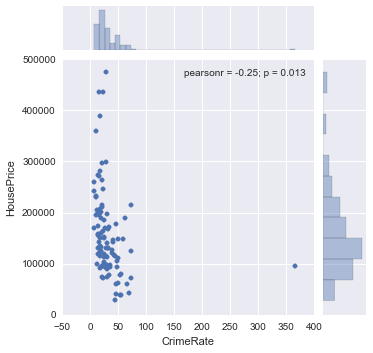

In [10]:
sns.jointplot(x="CrimeRate", y="HousePrice", data=sales, size=5)

In [13]:
#sales_numeric=sales[["Id","HousePrice","CrimeRate","MilesPhila","PopChg"]]
#sns.pairplot(sales_numeric.drop("Id", axis=1),hue=sales["Country"],size=4)

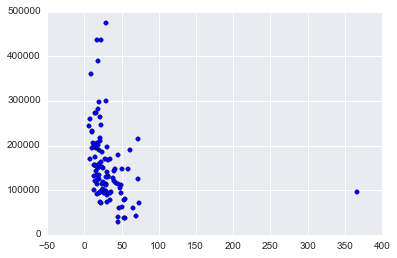

In [11]:
plt.scatter(sales["CrimeRate"],sales["HousePrice"])

In [15]:
Sales_out_Phila=sales[sales["CrimeRate"]<350]
Sales_below_3M=sales[sales["HousePrice"]<300000]
Sales_out_Phila_and_below_3m=sales[(sales["CrimeRate"]<350)&(sales["HousePrice"]<300000)]
print(Sales_out_Phila.shape)
print(Sales_below_3M.shape)
print(Sales_out_Phila_and_below_3m.shape)
#plt.scatter(sales[sales["CrimeRate"]<350],sales["HousePrice"])

(98, 8)
(94, 8)
(93, 8)


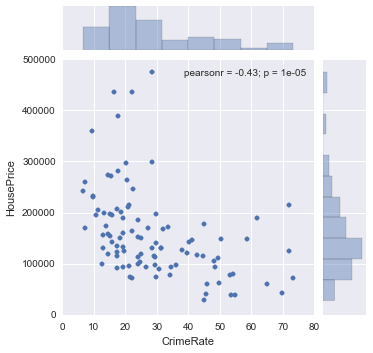

In [16]:

sns.jointplot(x="CrimeRate", y="HousePrice", data=Sales_out_Phila, size=5)




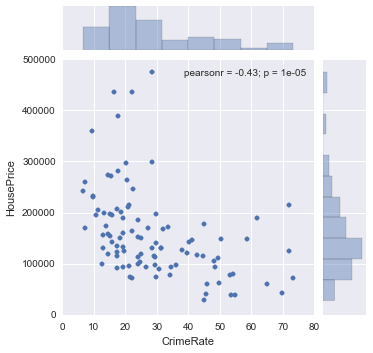

In [17]:

sns.jointplot(x="CrimeRate", y="HousePrice", data=Sales_out_Phila, size=5)




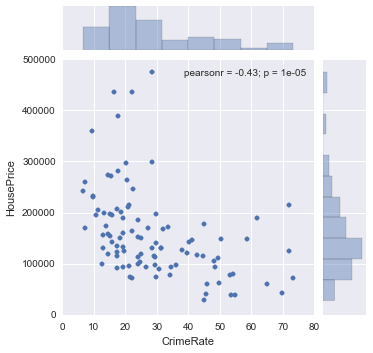

In [18]:
sns.jointplot(x="CrimeRate", y="HousePrice", data=Sales_out_Phila, size=5)


In [19]:
#import numpy as np
#Sales_out_Phila_and_below_3m["CrimeRate_log"]=np.log(Sales_out_Phila_and_below_3m["CrimeRate"])
#Sales_out_Phila_and_below_3m["Houseprice_log"]=np.log(Sales_out_Phila_and_below_3m["Houseprice"])


In [20]:
import numpy as np
import random
from sklearn.linear_model import LinearRegression
# Set a random seed to make the shuffle deterministic.
np.random.seed(1)
random.seed(1)
# Randomly shuffle the rows in our dataframe
Sales_out_Phila_and_below_3m = Sales_out_Phila_and_below_3m.loc[np.random.permutation(Sales_out_Phila_and_below_3m.index)]

# Select 70% of the dataset to be training data
highest_train_row = int(Sales_out_Phila_and_below_3m.shape[0] * .7)
train = Sales_out_Phila_and_below_3m.loc[:highest_train_row,:]

# Select 30% of the dataset to be test data.
test = Sales_out_Phila_and_below_3m.loc[highest_train_row:,:]

regressor = LinearRegression()
regressor.fit(train[["CrimeRate"]], train["HousePrice"])
regressor.score(train[["CrimeRate"]], train["HousePrice"])
predictions = regressor.predict(test[["CrimeRate"]])
mse = sum((predictions - test["HousePrice"]) ** 2) / len(predictions)
# summarize the fit of the model
#mse = np.mean((predictions-expected)**2)
print regressor.intercept_, regressor.coef_, mse
#print(regressor.score(dataset.data, dataset.target))

212955.384553 [-2337.97812716] 3804374005.52


In [21]:
#Sales_out_Phila=sales[sales["CrimeRate"]<350]

import numpy as np
import random
from sklearn.linear_model import LinearRegression
# Set a random seed to make the shuffle deterministic.
np.random.seed(1)
random.seed(1)
# Randomly shuffle the rows in our dataframe
Sales_out_Phila = Sales_out_Phila.loc[np.random.permutation( Sales_out_Phila.index)]

# Select 70% of the dataset to be training data
highest_train_row = int(Sales_out_Phila.shape[0] * .7)
train = Sales_out_Phila.loc[:highest_train_row,:]

# Select 30% of the dataset to be test data.
test = Sales_out_Phila.loc[highest_train_row:,:]

regressor = LinearRegression()
regressor.fit(train[["CrimeRate"]], train["HousePrice"])
regressor.score(train[["CrimeRate"]], train["HousePrice"])
predictions = regressor.predict(test[["CrimeRate"]])
mse = sum((predictions - test["HousePrice"]) ** 2) / len(predictions)
# summarize the fit of the model
#mse = np.mean((predictions-expected)**2)
print regressor.intercept_, regressor.coef_, mse
#print(regressor.score(dataset.data, dataset.target))

151230.731964 [-888.48445393] 8343830451.51


In [22]:
#Sales_below_3M=sales[sales["HousePrice"]<300000]
import numpy as np
import random
from sklearn.linear_model import LinearRegression
# Set a random seed to make the shuffle deterministic.
np.random.seed(1)
random.seed(1)
# Randomly shuffle the rows in our dataframe
Sales_below_3M = Sales_below_3M.loc[np.random.permutation(Sales_below_3M.index)]

# Select 70% of the dataset to be training data
highest_train_row = int(Sales_below_3M.shape[0] * .7)
train = Sales_below_3M.loc[:highest_train_row,:]

# Select 30% of the dataset to be test data.
test = Sales_below_3M.loc[highest_train_row:,:]

regressor = LinearRegression()
regressor.fit(train[["CrimeRate"]], train["HousePrice"])
regressor.score(train[["CrimeRate"]], train["HousePrice"])
predictions = regressor.predict(test[["CrimeRate"]])
mse = sum((predictions - test["HousePrice"]) ** 2) / len(predictions)
# summarize the fit of the model
#mse = np.mean((predictions-expected)**2)
print regressor.intercept_, regressor.coef_, mse
#print(regressor.score(dataset.data, dataset.target))

209523.201736 [-2398.10112584] 13912252160.1


In [23]:
Sales_out_Phila_and_below_3m["HousePrice_normal"] = (Sales_out_Phila_and_below_3m["HousePrice"] - Sales_out_Phila_and_below_3m["HousePrice"].mean()) / Sales_out_Phila_and_below_3m["HousePrice"].std()
Sales_out_Phila_and_below_3m["CrimeRate_normal"] = (Sales_out_Phila_and_below_3m["CrimeRate"] - Sales_out_Phila_and_below_3m["CrimeRate"].mean()) / Sales_out_Phila_and_below_3m["CrimeRate"].std()

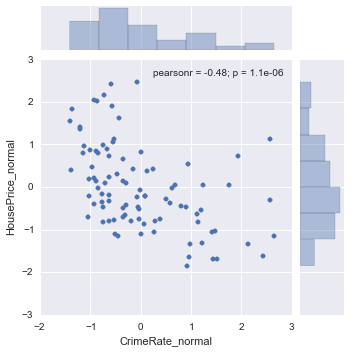

In [24]:
sns.jointplot(x="CrimeRate_normal", y="HousePrice_normal", data=Sales_out_Phila_and_below_3m, size=5)

In [25]:
import numpy as np
import random
from sklearn.linear_model import LinearRegression
# Set a random seed to make the shuffle deterministic.
np.random.seed(1)
random.seed(1)
# Randomly shuffle the rows in our dataframe
Sales_out_Phila_and_below_3m = Sales_out_Phila_and_below_3m.loc[np.random.permutation(Sales_out_Phila_and_below_3m.index)]

# Select 70% of the dataset to be training data
highest_train_row = int(Sales_out_Phila_and_below_3m.shape[0] * .7)
train = Sales_out_Phila_and_below_3m.loc[:highest_train_row,:]

# Select 30% of the dataset to be test data.
test = Sales_out_Phila_and_below_3m.loc[highest_train_row:,:]

regressor = LinearRegression()
regressor.fit(train[["CrimeRate_normal"]], train["HousePrice_normal"])
regressor.score(train[["CrimeRate_normal"]], train["HousePrice_normal"])
predictions = regressor.predict(test[["CrimeRate_normal"]])

mse = sum((predictions - test["HousePrice_normal"]) ** 2) / len(predictions)

Sales_out_Phila_and_below_3m["HousePrice_normal"] = (Sales_out_Phila_and_below_3m["HousePrice"] - Sales_out_Phila_and_below_3m["HousePrice"].mean()) / Sales_out_Phila_and_below_3m["HousePrice"].std()
Sales_out_Phila_and_below_3m["CrimeRate_normal"] = (Sales_out_Phila_and_below_3m["CrimeRate"] - Sales_out_Phila_and_below_3m["CrimeRate"].mean()) / Sales_out_Phila_and_below_3m["CrimeRate"].std()

# summarize the fit of the model
#mse = np.mean((predictions-expected)**2)
print regressor.intercept_, regressor.coef_, mse
#print(regressor.score(dataset.data, dataset.target))

-0.0739525068493 [-0.41160911] 0.922199699635


In [ ]:
##TO CONVERT BACK TO ORIGINAL
prediction_not_normal=(prediction_not_normal.std())*predictions+prediction_not_normal.mean()